In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
finname = '2017-09-25NMF_Ncomps16Basis.npy'

In [4]:
Basis = np.load(finname)

In [5]:
normedBasis = (Basis.T / np.sum(Basis.T, axis=0)).T

In [6]:
def make_stacked_bar_plot(Ncomps, Nrelevant, BarMatrix, bargraph_out, names = [], plotClusterMode=False, barsortorder=[], clusterTopLabels=[], colormode='Sasha'):
    if len(barsortorder)<1:
        barsortorder = np.arange(Nrelevant)
        print('inventing barsortorder')
    if len(names) < 1:
        print('inventing names')
        names = [str(i) for i in range(Nrelevant)]
        names = np.array(names)
    ttt = np.arange(Nrelevant)
    start = 0
    end = Nrelevant
    ground_pSample = ttt*0
    Comp_colors = define_colorsA(Ncomps, mode=colormode)
    plt.clf()
    plt.figure(figsize=(150,40))
    plt.bar(ttt[start:end], BarMatrix[0,start:end][barsortorder], color='r',
             bottom=ground_pSample[start:end], alpha=0.75)
    ground_pSample = BarMatrix[0,start:end][barsortorder]
    for i in range(1,Ncomps):
        plt.bar(ttt[start:end],BarMatrix[i,start:end][barsortorder], bottom = ground_pSample, color=Comp_colors[i], alpha=0.75)
        ground_pSample = np.sum(BarMatrix[0: i+1,start:end], axis=0)[barsortorder]
    increase_axis_fontsize()
    plt.ylabel('sum of signal in matrix',fontsize=70)
    #plt.title('Full Sample',fontsize=70)
    samplenamesize = 11
    samplenamesize = (1/Nrelevant)**0.5 * 300
    #thebottom = 0.15
    thebottom = min([(1/Nrelevant)**0.3 * 1.2, 0.5])
    if(plotClusterMode):
        plt.xticks(ttt, ttt.astype(str), rotation='vertical', fontsize=samplenamesize)
        if len(clusterTopLabels) > 0:
            ax = plt.gca()
            ax2 = ax.twiny()
            ax2.set_xticks(ttt)
            ax2.set_xticklabels(clusterTopLabels.astype(str), rotation=90, fontsize=samplenamesize)
            #ax.xaxis.tick_top()
            #plt.xticks(ttt, clusterTopLabels.astype(str), rotation='vertical', fontsize=samplenamesize)
    else:
        plt.xticks(ttt, names[barsortorder], rotation='vertical', fontsize=samplenamesize)	
    plot_margin = 5
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=thebottom)
    plt.savefig(bargraph_out)
    plt.close()	

In [7]:
def define_colorsA(Ncomps, mode='Sasha'):
    if (mode=='Sasha'):
        Comp_colors = ['red', 'tan', 'lime','blue','m','k','c', 'coral', 'indigo','darkgreen','orange','grey','gold', 'lightskyblue', 'peru', 'olive']
    elif (mode == 'Wouter'):
        Comp_colors = ["#A6CEE3", "#438EC0", "#63A8A0", "#98D277", "#3BA432", "#B89B74", "#F16667", "#E62F27", "#F9A963", "#FE982C", "#ED8F47", "#C3AAD2", "#7D54A5","#B9A499", "#EAD27A" ,"#B15928"]
    if (Ncomps>16):
        np.random.seed(666)
        from matplotlib import colors as mcolors
        colornames = list(mcolors.CSS4_COLORS.keys())
        count = 16
        while (count < Ncomps):
            newcolor = colornames[np.random.randint(0,len(colornames))]
            trialcount = 0
            while ((newcolor in Comp_colors) and (trialcount < 100)):
                newcolor = colornames[np.random.randint(0,len(colornames))]
                trialcount+=1
            Comp_colors.append(newcolor)
            count+=1
    return Comp_colors

In [8]:
from OONMFhelpers import *

/Users/amuratov/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [9]:
finname = '2017-09-25NMF_Ncomps16Mixture.npy'
Mixture = np.load(finname)

In [10]:
NormedMixture =   Mixture / np.sum(Mixture, axis=0)

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
agglom_normed_sample= AgglomerativeClustering(n_clusters=16).fit(normedBasis)


In [15]:
dir(agglom_normed_sample)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 'affinity',
 'children_',
 'compute_full_tree',
 'connectivity',
 'fit',
 'fit_predict',
 'get_params',
 'labels_',
 'linkage',
 'memory',
 'n_clusters',
 'n_components_',
 'n_leaves_',
 'pooling_func',
 'set_params']

In [24]:
agglom_normed_sample.affinity

'euclidean'

In [28]:
agglom_normed_sample.labels_



array([ 3,  1,  3,  1,  0, 14,  0,  8,  1,  0,  1,  0, 13, 13, 13,  0, 11,
       11, 10, 10,  7,  7,  7,  7,  7,  7,  7,  7,  7,  0,  9,  5,  5,  1,
       11,  7,  5,  1,  5,  4,  1,  1,  0,  3,  0,  4,  9,  9,  1,  1,  2,
       15,  2, 14,  3,  3,  3,  3,  3,  3,  0,  0,  1,  1,  3,  4,  4,  4,
        1,  4,  1,  5,  1, 14, 14,  1,  3,  3,  9,  9,  1,  8,  6,  4,  1,
        8,  3,  1,  1,  3,  3,  1,  1,  0,  9,  9,  1,  3,  3,  9,  8,  3,
        4,  1,  4,  1,  3,  4,  4, 11,  6, 14,  1,  4,  2,  3,  2,  2,  9,
        9,  2,  8,  2,  2,  9,  1,  6,  6, 14,  2,  8,  2,  8, 14,  3,  3,
        3,  3,  1,  2,  2,  9,  2,  2,  2,  2,  9,  9,  2,  2,  8,  2,  9,
        0,  1,  0,  8,  2,  3,  3,  2,  8,  1,  1,  9,  9,  3,  3,  2,  8,
        4,  7, 10,  1,  8,  2,  8,  2,  3,  3,  9,  9,  9,  8,  3,  0,  9,
        9,  9,  9, 10,  9,  9,  1,  8,  3,  8,  8,  8,  2,  8,  8, 14, 15,
        1, 15, 15, 15,  4,  1,  1,  1,  1,  1,  3,  3,  3,  6, 14, 15, 15,
       15, 15,  9,  9,  8

In [39]:
agglom_normed_sample.memory

In [42]:
agglom_normed_sample.children_

array([[ 145,  529],
       [ 551,  558],
       [ 315,  356],
       ..., 
       [1282, 1297],
       [1271, 1298],
       [1291, 1299]])

In [12]:
from scipy.cluster.hierarchy import linkage, fcluster

In [233]:
Z = linkage(normedBasis, method='complete', metric='euclidean')

In [234]:
Z.shape

(650, 4)

In [235]:
from scipy.cluster.hierarchy import dendrogram

In [237]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


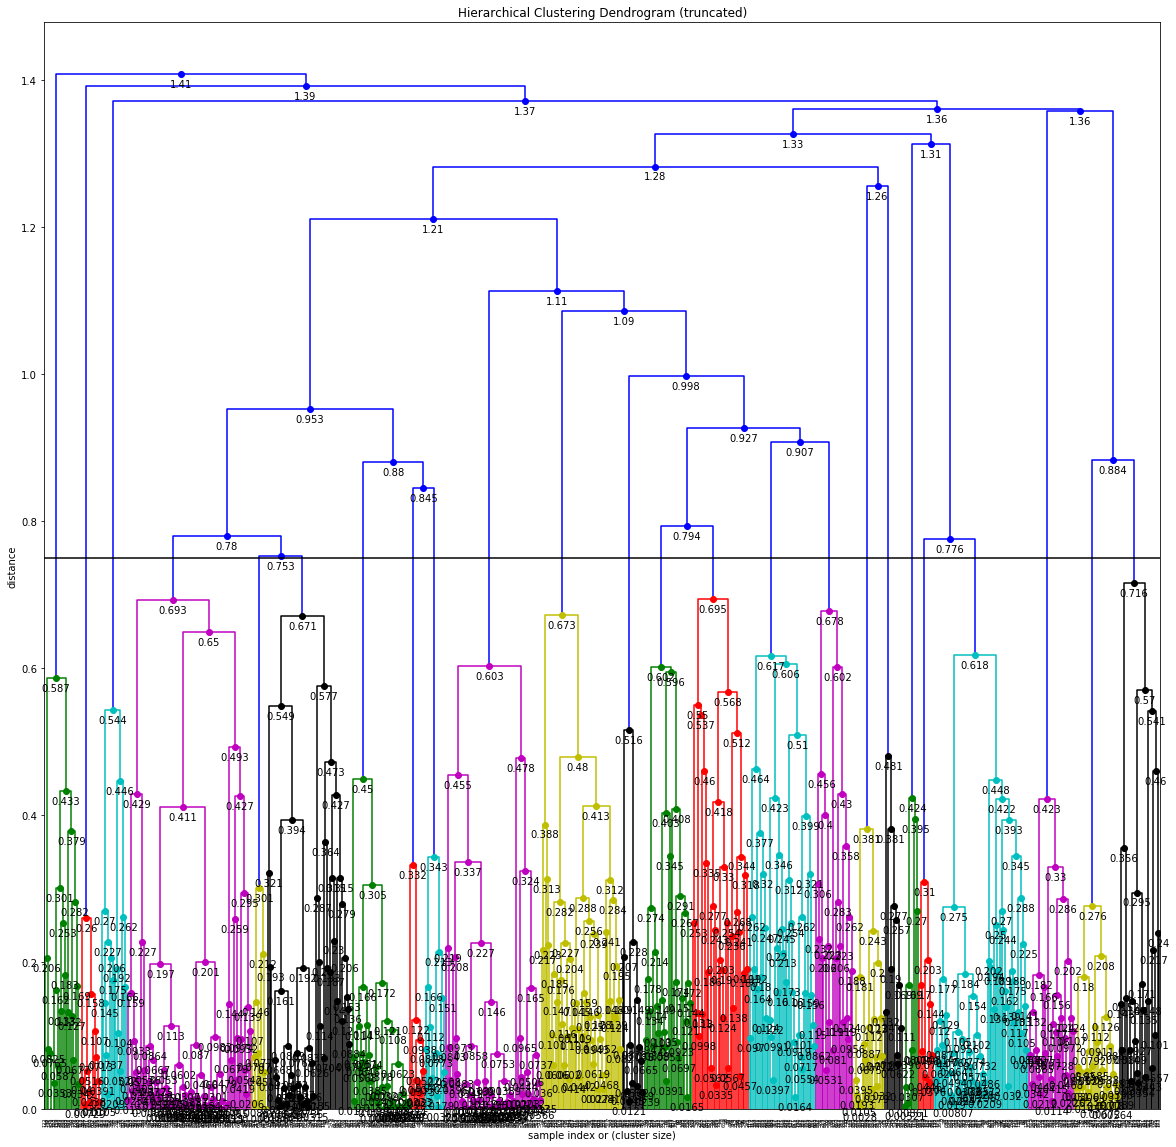

In [247]:
plt.clf()
plt.figure(figsize=(20, 20))
fancy_dendrogram(Z, max_d=0.75)
plt.show()

In [248]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(normedBasis))
c

0.76096821296142347

In [250]:
clusters = fcluster(Z, 0.75, criterion='distance')


In [251]:
len(list(set(clusters)))

24

In [254]:
clusters

array([21, 11, 21, 14,  6, 22,  6, 11, 14,  6, 14,  4, 18, 18, 18,  4, 10,
       10,  7,  7,  4,  4,  4,  8,  8,  4,  8,  8,  4,  6, 23,  3, 24, 16,
       10,  4,  3, 14,  3, 13,  6,  6,  4, 21,  6,  2, 24, 24, 14, 14,  1,
       17,  1, 22, 21, 21, 21, 21, 21, 21,  6,  6, 13, 13, 21, 13, 13, 13,
       14, 13, 16,  3, 16, 22, 22, 14, 21, 21, 23, 23, 14, 11,  5, 13, 16,
       11, 21, 14, 14, 21, 21, 11, 16,  4, 23, 23, 14, 21, 21, 23, 11, 21,
       13, 16, 13, 16, 21, 13, 13, 14, 19, 22, 16,  2, 15, 21, 15, 15, 23,
       24, 15, 11,  1,  1, 24,  6, 19, 19, 22, 15, 11, 15, 11, 22, 21, 21,
       21, 21,  6,  1,  1, 23, 15, 15,  1,  1, 23, 23,  1,  1, 11, 15, 24,
        6, 13,  6, 11, 15, 20, 20, 15, 11, 14, 14, 24, 24, 21, 21, 15, 11,
        2,  4,  7, 24, 11, 15, 11, 15, 21, 21, 23, 24, 24, 11, 20,  9, 23,
       24, 23, 23,  7, 23, 23, 24, 11, 20, 11, 11, 11, 15, 11, 11, 22, 17,
       16, 17, 17, 17, 13, 13, 14, 13, 14, 16, 21, 21, 21,  5, 22, 17, 17,
       17, 17, 23, 23, 11

In [255]:
set(clusters)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [259]:
for i in range(1,25):
    print('doing ',i)
    basiscut = clusters==i
    normedbarsortorder = get_barsortorder(normedBasis[basiscut])
    make_stacked_bar_plot(16, len(basiscut[basiscut]), normedBasis[basiscut].T, 'HCbasisnormed'+str(i)+'of24.pdf', barsortorder=normedbarsortorder)

doing  1
inventing names
doing  2
inventing names
doing  3
inventing names
doing  4
inventing names
doing  5
inventing names
doing  6
inventing names
doing  7
inventing names
doing  8
inventing names
doing  9
inventing names
doing  10
inventing names
doing  11
inventing names
doing  12
inventing names
doing  13
inventing names
doing  14
inventing names
doing  15
inventing names
doing  16
inventing names
doing  17
inventing names
doing  18
inventing names
doing  19
inventing names
doing  20
inventing names
doing  21
inventing names
doing  22
inventing names
doing  23
inventing names
doing  24
inventing names


In [252]:
clusters

array([21, 11, 21, 14,  6, 22,  6, 11, 14,  6, 14,  4, 18, 18, 18,  4, 10,
       10,  7,  7,  4,  4,  4,  8,  8,  4,  8,  8,  4,  6, 23,  3, 24, 16,
       10,  4,  3, 14,  3, 13,  6,  6,  4, 21,  6,  2, 24, 24, 14, 14,  1,
       17,  1, 22, 21, 21, 21, 21, 21, 21,  6,  6, 13, 13, 21, 13, 13, 13,
       14, 13, 16,  3, 16, 22, 22, 14, 21, 21, 23, 23, 14, 11,  5, 13, 16,
       11, 21, 14, 14, 21, 21, 11, 16,  4, 23, 23, 14, 21, 21, 23, 11, 21,
       13, 16, 13, 16, 21, 13, 13, 14, 19, 22, 16,  2, 15, 21, 15, 15, 23,
       24, 15, 11,  1,  1, 24,  6, 19, 19, 22, 15, 11, 15, 11, 22, 21, 21,
       21, 21,  6,  1,  1, 23, 15, 15,  1,  1, 23, 23,  1,  1, 11, 15, 24,
        6, 13,  6, 11, 15, 20, 20, 15, 11, 14, 14, 24, 24, 21, 21, 15, 11,
        2,  4,  7, 24, 11, 15, 11, 15, 21, 21, 23, 24, 24, 11, 20,  9, 23,
       24, 23, 23,  7, 23, 23, 24, 11, 20, 11, 11, 11, 15, 11, 11, 22, 17,
       16, 17, 17, 17, 13, 13, 14, 13, 14, 16, 21, 21, 21,  5, 22, 17, 17,
       17, 17, 23, 23, 11

In [167]:
fcluster(Z, t=1.1545)

array([26, 20, 26, 20, 15, 27, 15, 20, 20, 12, 20, 10, 25, 25, 25, 10, 20,
       20, 17, 17,  7,  8,  9, 18, 18,  5, 18, 18,  9, 16, 27,  3, 27, 20,
       20,  8,  3, 20,  3, 20, 14, 14, 10, 26, 12,  2, 27, 27, 20, 20,  1,
       24,  1, 27, 26, 26, 26, 26, 26, 26, 12, 12, 20, 20, 26, 20, 20, 20,
       20, 20, 20,  3, 20, 27, 27, 20, 26, 26, 27, 27, 20, 20, 11, 20, 20,
       20, 26, 20, 20, 26, 26, 20, 20, 10, 27, 27, 20, 26, 26, 27, 20, 26,
       20, 20, 20, 20, 26, 20, 20, 20, 26, 27, 20,  2, 20, 26, 20, 20, 27,
       27, 20, 20,  1,  1, 27, 14, 26, 26, 27, 20, 20, 20, 20, 27, 26, 26,
       26, 26, 14,  1,  1, 27, 20, 20,  1,  1, 27, 27,  1,  1, 20, 20, 27,
       12, 20, 12, 20, 20, 26, 26, 20, 20, 20, 20, 27, 27, 26, 26, 20, 20,
        2,  8, 17, 27, 20, 20, 20, 20, 26, 26, 27, 27, 27, 20, 26, 19, 27,
       27, 27, 27, 17, 27, 27, 27, 20, 26, 20, 20, 20, 20, 20, 20, 27, 21,
       20, 21, 21, 21, 20, 20, 20, 20, 20, 20, 26, 26, 26, 11, 27, 23, 24,
       22, 21, 27, 27, 20

In [260]:
NormedMixture.shape

(16, 2232744)

In [262]:
NormedMixture.shape[1]

2232744

In [17]:
DHSsample = np.random.choice(NormedMixture.shape[1],5000, replace=False)

In [18]:
DHScut = np.in1d(np.arange(NormedMixture.shape[1]), DHSsample)

In [275]:
NormedMixture.T[DHScut].shape

(5000, 16)

In [19]:
ZDHS = linkage(NormedMixture.T[DHScut], method='complete', metric='euclidean')

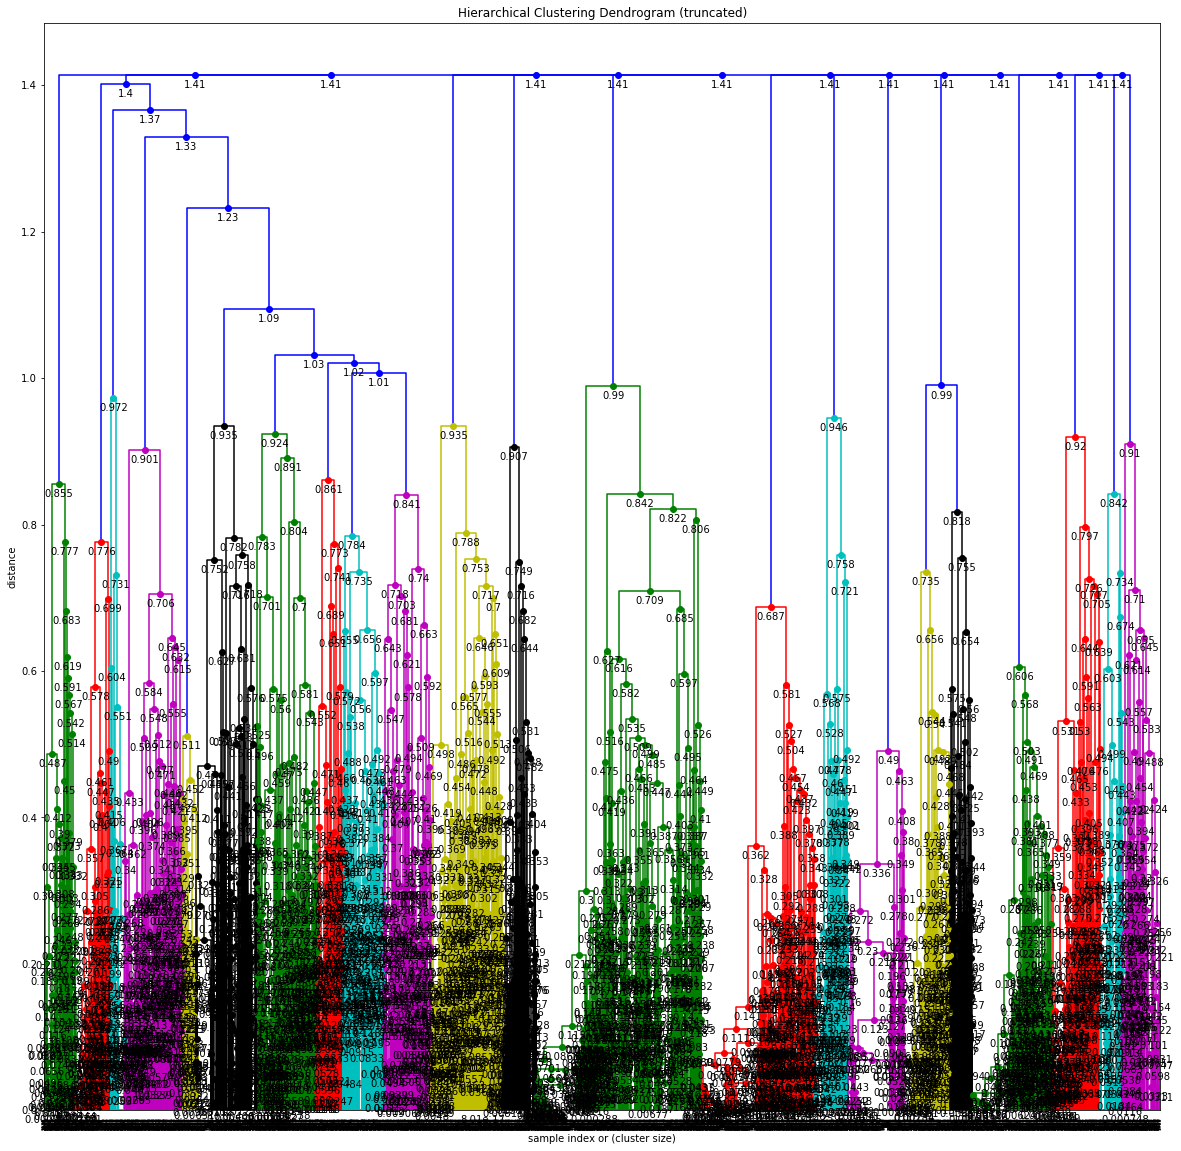

In [277]:
plt.clf()
plt.figure(figsize=(20, 20))
fancy_dendrogram(ZDHS)
plt.show()

In [20]:
clusters = fcluster(ZDHS, 0.5, criterion='distance')


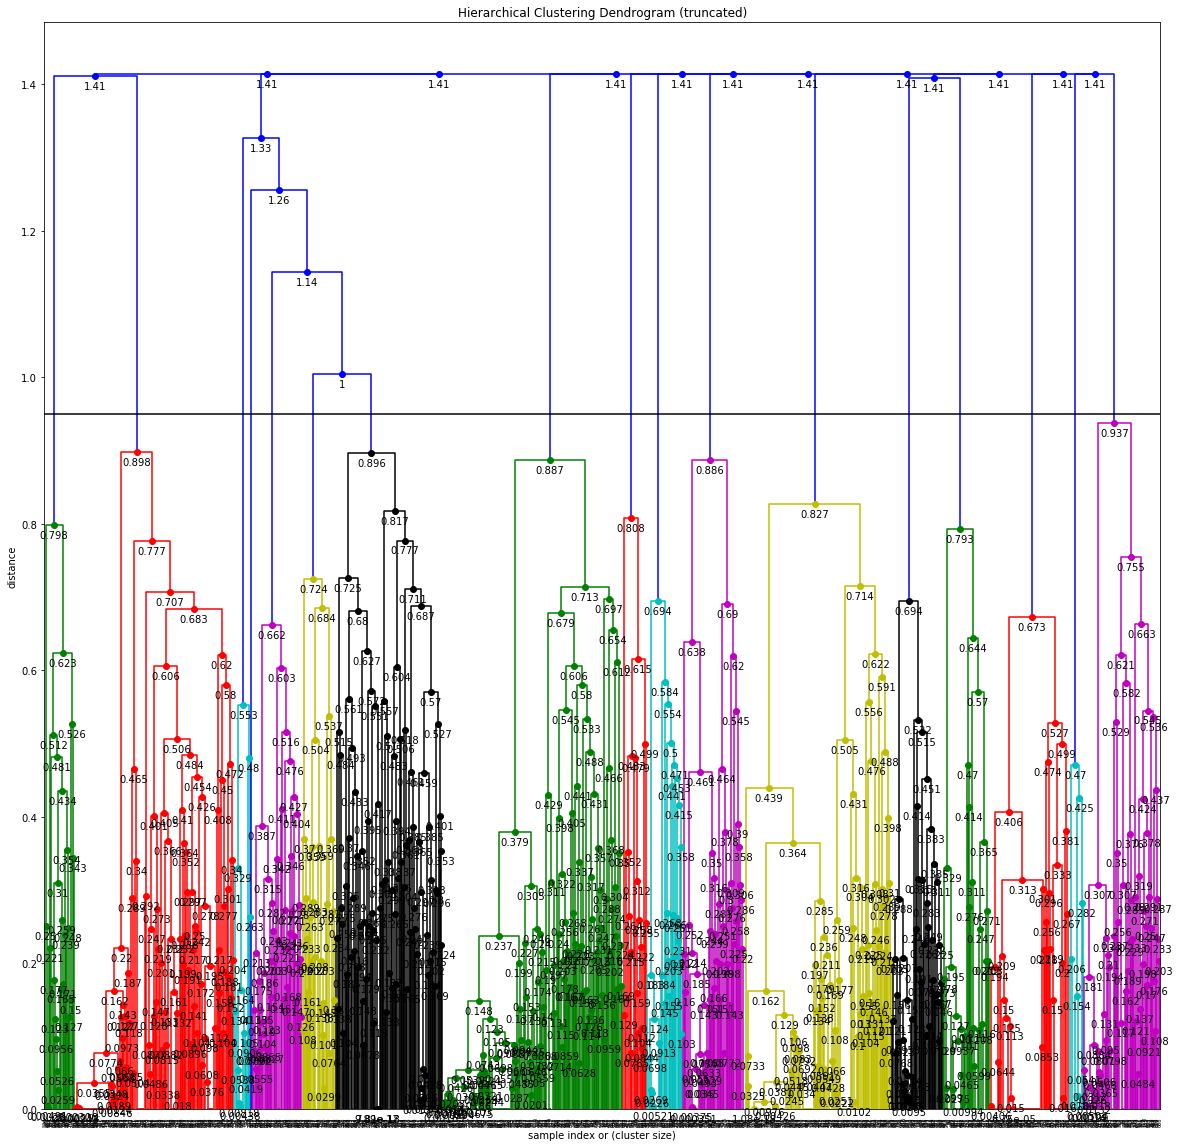

In [271]:
plt.clf()
plt.figure(figsize=(20, 20))
fancy_dendrogram(ZDHS, max_d=0.95)
plt.show()

In [279]:
len(list(set(clusters)))

187

In [337]:
NormedMixture.shape[1]

2232744

In [21]:
ZDHS = linkage(NormedMixture.T[DHScut], method='complete', metric='euclidean')

In [14]:
dists = np.linspace(0.01, 1, 100)

In [22]:
numDHSclusts = []
for dist in dists: 
    print('doing', dist)
    clusters = fcluster(ZDHS, dist, criterion='distance')
    numDHSclusts.append(len(list(set(clusters))))


doing 0.01
doing 0.02
doing 0.03
doing 0.04
doing 0.05
doing 0.06
doing 0.07
doing 0.08
doing 0.09
doing 0.1
doing 0.11
doing 0.12
doing 0.13
doing 0.14
doing 0.15
doing 0.16
doing 0.17
doing 0.18
doing 0.19
doing 0.2
doing 0.21
doing 0.22
doing 0.23
doing 0.24
doing 0.25
doing 0.26
doing 0.27
doing 0.28
doing 0.29
doing 0.3
doing 0.31
doing 0.32
doing 0.33
doing 0.34
doing 0.35
doing 0.36
doing 0.37
doing 0.38
doing 0.39
doing 0.4
doing 0.41
doing 0.42
doing 0.43
doing 0.44
doing 0.45
doing 0.46
doing 0.47
doing 0.48
doing 0.49
doing 0.5
doing 0.51
doing 0.52
doing 0.53
doing 0.54
doing 0.55
doing 0.56
doing 0.57
doing 0.58
doing 0.59
doing 0.6
doing 0.61
doing 0.62
doing 0.63
doing 0.64
doing 0.65
doing 0.66
doing 0.67
doing 0.68
doing 0.69
doing 0.7
doing 0.71
doing 0.72
doing 0.73
doing 0.74
doing 0.75
doing 0.76
doing 0.77
doing 0.78
doing 0.79
doing 0.8
doing 0.81
doing 0.82
doing 0.83
doing 0.84
doing 0.85
doing 0.86
doing 0.87
doing 0.88
doing 0.89
doing 0.9
doing 0.91
doing 0.

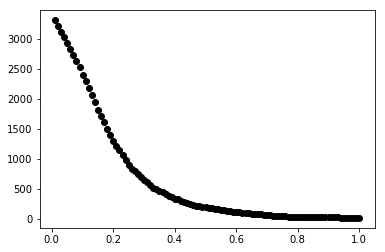

In [23]:
plt.clf()
plt.plot(dists, numDHSclusts, 'ok')
plt.show()

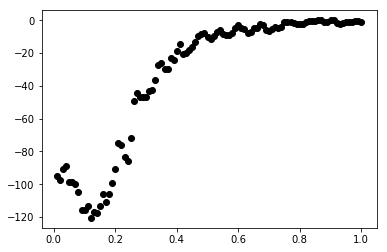

In [24]:
plt.clf()
plt.plot(dists, np.gradient(numDHSclusts), 'ok')
plt.show()

In [16]:
DHSsample2500 = np.random.choice(NormedMixture.shape[1],2500, replace=False)
print('done')
DHScut2500 = np.in1d(np.arange(NormedMixture.shape[1]), DHSsample2500)

ZDHS2500 = linkage(NormedMixture.T[DHScut2500], method='complete', metric='euclidean')
print('done with ZDHS')

numDHSclusts2500 = []
for dist in dists: 
    print('doing', dist)
    clusters = fcluster(ZDHS2500, dist, criterion='distance')
    numDHSclusts2500.append(len(list(set(clusters))))

done
done with ZDHS
doing 0.01
doing 0.02
doing 0.03
doing 0.04
doing 0.05
doing 0.06
doing 0.07
doing 0.08
doing 0.09
doing 0.1
doing 0.11
doing 0.12
doing 0.13
doing 0.14
doing 0.15
doing 0.16
doing 0.17
doing 0.18
doing 0.19
doing 0.2
doing 0.21
doing 0.22
doing 0.23
doing 0.24
doing 0.25
doing 0.26
doing 0.27
doing 0.28
doing 0.29
doing 0.3
doing 0.31
doing 0.32
doing 0.33
doing 0.34
doing 0.35
doing 0.36
doing 0.37
doing 0.38
doing 0.39
doing 0.4
doing 0.41
doing 0.42
doing 0.43
doing 0.44
doing 0.45
doing 0.46
doing 0.47
doing 0.48
doing 0.49
doing 0.5
doing 0.51
doing 0.52
doing 0.53
doing 0.54
doing 0.55
doing 0.56
doing 0.57
doing 0.58
doing 0.59
doing 0.6
doing 0.61
doing 0.62
doing 0.63
doing 0.64
doing 0.65
doing 0.66
doing 0.67
doing 0.68
doing 0.69
doing 0.7
doing 0.71
doing 0.72
doing 0.73
doing 0.74
doing 0.75
doing 0.76
doing 0.77
doing 0.78
doing 0.79
doing 0.8
doing 0.81
doing 0.82
doing 0.83
doing 0.84
doing 0.85
doing 0.86
doing 0.87
doing 0.88
doing 0.89
doing 0.9

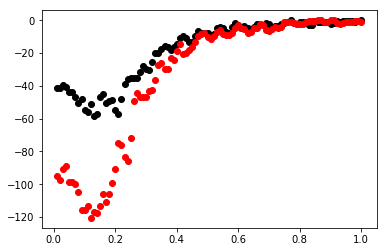

In [25]:
plt.clf()
plt.plot(dists, np.gradient(numDHSclusts2500), 'ok')
plt.plot(dists, np.gradient(numDHSclusts), 'or')
plt.show()

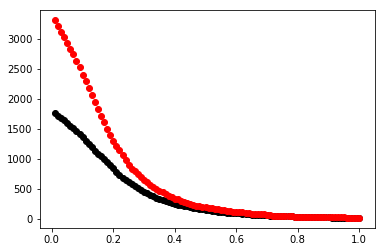

In [26]:
plt.clf()
plt.plot(dists, numDHSclusts2500, 'ok')
plt.plot(dists, numDHSclusts, 'or')
plt.show()

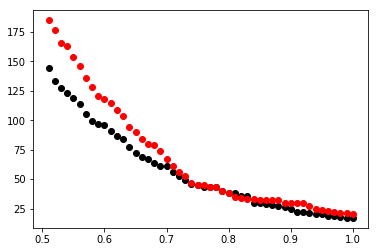

In [27]:
plt.clf()
plt.plot(dists[50:], numDHSclusts2500[50:], 'ok')
plt.plot(dists[50:], numDHSclusts[50:], 'or')
plt.show()

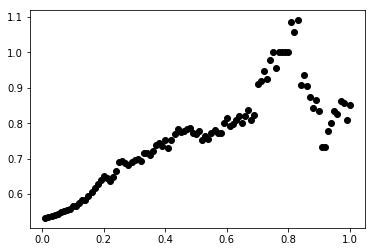

In [28]:
plt.clf()
plt.plot(dists, np.array(numDHSclusts2500)/np.array(numDHSclusts), 'ok')
plt.show()

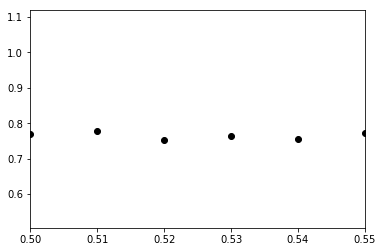

In [29]:
plt.clf()
plt.plot(dists, np.array(numDHSclusts2500)/np.array(numDHSclusts), 'ok')
plt.xlim(0.5, 0.55)
plt.show()

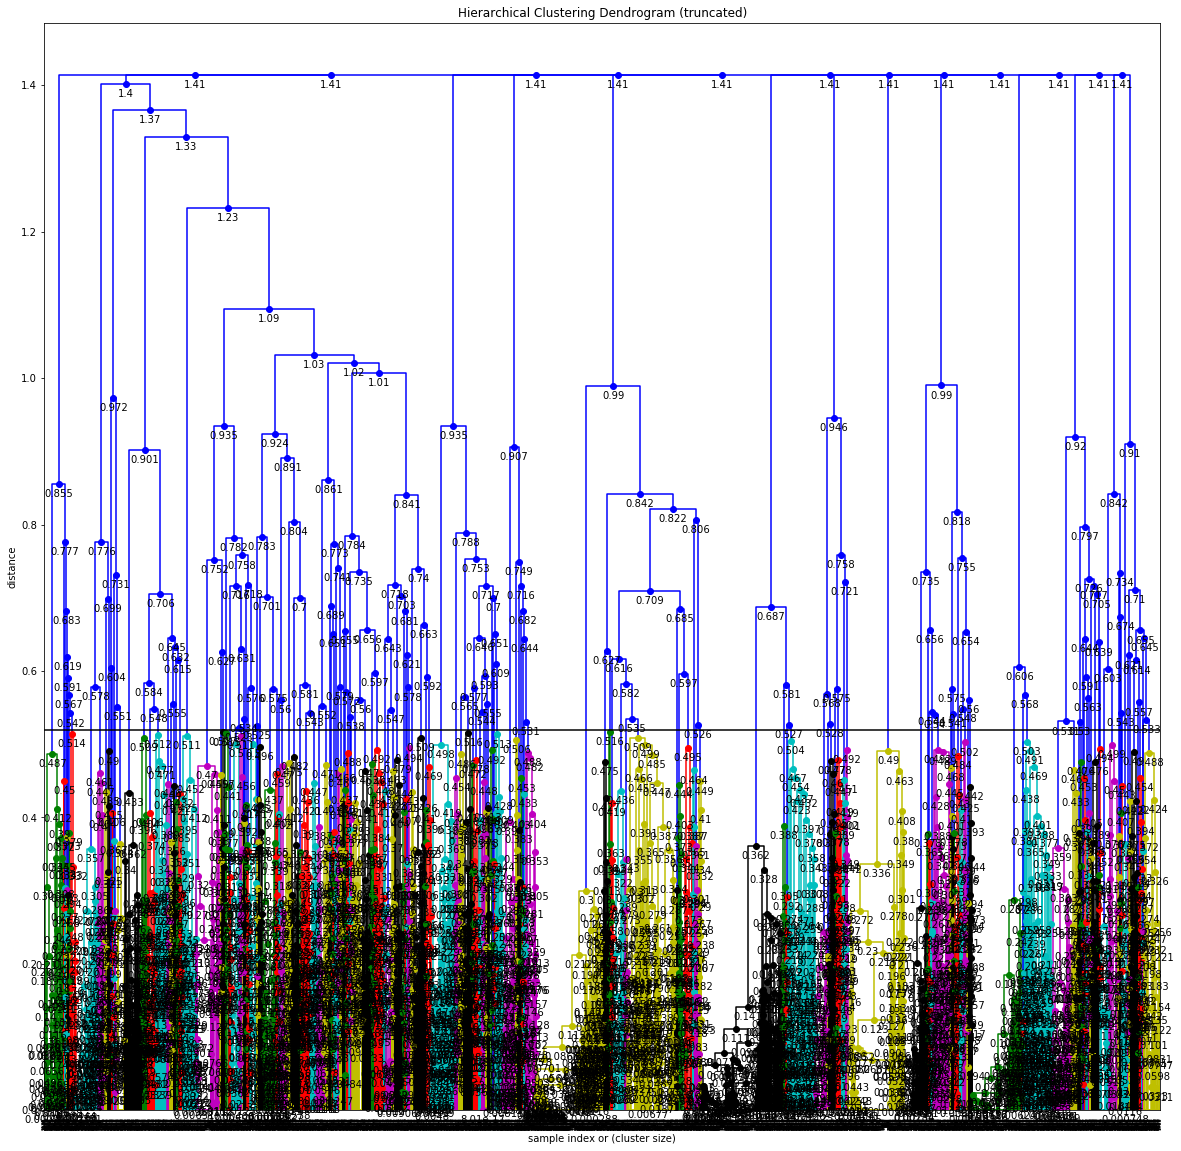

In [299]:
plt.clf()
plt.figure(figsize=(20, 20))
fancy_dendrogram(ZDHS, max_d=0.52)
plt.show()

In [302]:
numBasis = []
extdists = np.linspace(0.01, 2, 200)
for dist in extdists: 
    print('doing', dist)
    clusters = fcluster(Z, dist, criterion='distance')
    numBasis.append(len(list(set(clusters))))

doing 0.01
doing 0.02
doing 0.03
doing 0.04
doing 0.05
doing 0.06
doing 0.07
doing 0.08
doing 0.09
doing 0.1
doing 0.11
doing 0.12
doing 0.13
doing 0.14
doing 0.15
doing 0.16
doing 0.17
doing 0.18
doing 0.19
doing 0.2
doing 0.21
doing 0.22
doing 0.23
doing 0.24
doing 0.25
doing 0.26
doing 0.27
doing 0.28
doing 0.29
doing 0.3
doing 0.31
doing 0.32
doing 0.33
doing 0.34
doing 0.35
doing 0.36
doing 0.37
doing 0.38
doing 0.39
doing 0.4
doing 0.41
doing 0.42
doing 0.43
doing 0.44
doing 0.45
doing 0.46
doing 0.47
doing 0.48
doing 0.49
doing 0.5
doing 0.51
doing 0.52
doing 0.53
doing 0.54
doing 0.55
doing 0.56
doing 0.57
doing 0.58
doing 0.59
doing 0.6
doing 0.61
doing 0.62
doing 0.63
doing 0.64
doing 0.65
doing 0.66
doing 0.67
doing 0.68
doing 0.69
doing 0.7
doing 0.71
doing 0.72
doing 0.73
doing 0.74
doing 0.75
doing 0.76
doing 0.77
doing 0.78
doing 0.79
doing 0.8
doing 0.81
doing 0.82
doing 0.83
doing 0.84
doing 0.85
doing 0.86
doing 0.87
doing 0.88
doing 0.89
doing 0.9
doing 0.91
doing 0.

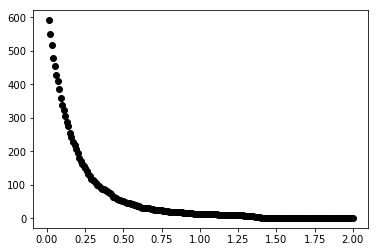

In [304]:
plt.clf()
plt.plot(extdists, numBasis, 'ok')
plt.show()

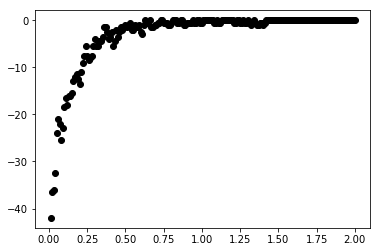

In [305]:
plt.clf()
plt.plot(extdists, np.gradient(numBasis), 'ok')
plt.show()

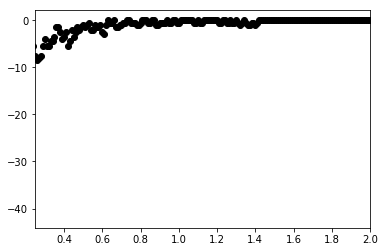

In [313]:
plt.clf()
plt.plot(extdists, np.gradient(numBasis), 'ok')
plt.xlim(0.25,2.00)
plt.show()

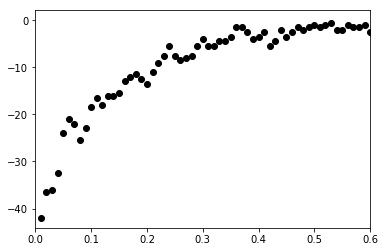

In [314]:
plt.clf()
plt.plot(extdists, np.gradient(numBasis), 'ok')
plt.xlim(0.,0.6)
plt.show()

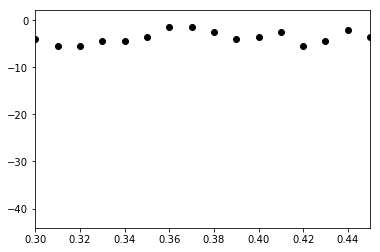

In [315]:
plt.clf()
plt.plot(extdists, np.gradient(numBasis), 'ok')
plt.xlim(0.3,0.45)
plt.show()

In [317]:
extdists[34]

0.35000000000000003

In [318]:
numBasis[34]

90

In [15]:
DHSsample1e4 = np.random.choice(NormedMixture.shape[1],10000, replace=False)
print('done')
DHScut1e4 = np.in1d(np.arange(NormedMixture.shape[1]), DHSsample1e4)

ZDHS1e4 = linkage(NormedMixture.T[DHScut1e4], method='complete', metric='euclidean')
print('done with ZDHS')

numDHSclusts1e4 = []
for dist in dists: 
    print('doing', dist)
    clusters = fcluster(ZDHS1e4, dist, criterion='distance')
    numDHSclusts1e4.append(len(list(set(clusters))))

done
done with ZDHS
doing 0.01
doing 0.02
doing 0.03
doing 0.04
doing 0.05
doing 0.06
doing 0.07
doing 0.08
doing 0.09
doing 0.1
doing 0.11
doing 0.12
doing 0.13
doing 0.14
doing 0.15
doing 0.16
doing 0.17
doing 0.18
doing 0.19
doing 0.2
doing 0.21
doing 0.22
doing 0.23
doing 0.24
doing 0.25
doing 0.26
doing 0.27
doing 0.28
doing 0.29
doing 0.3
doing 0.31
doing 0.32
doing 0.33
doing 0.34
doing 0.35
doing 0.36
doing 0.37
doing 0.38
doing 0.39
doing 0.4
doing 0.41
doing 0.42
doing 0.43
doing 0.44
doing 0.45
doing 0.46
doing 0.47
doing 0.48
doing 0.49
doing 0.5
doing 0.51
doing 0.52
doing 0.53
doing 0.54
doing 0.55
doing 0.56
doing 0.57
doing 0.58
doing 0.59
doing 0.6
doing 0.61
doing 0.62
doing 0.63
doing 0.64
doing 0.65
doing 0.66
doing 0.67
doing 0.68
doing 0.69
doing 0.7
doing 0.71
doing 0.72
doing 0.73
doing 0.74
doing 0.75
doing 0.76
doing 0.77
doing 0.78
doing 0.79
doing 0.8
doing 0.81
doing 0.82
doing 0.83
doing 0.84
doing 0.85
doing 0.86
doing 0.87
doing 0.88
doing 0.89
doing 0.9

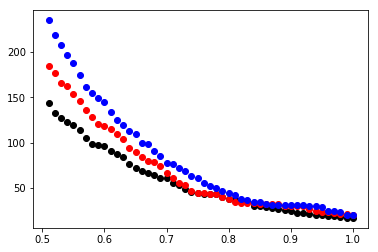

In [30]:
plt.clf()
plt.plot(dists[50:], numDHSclusts2500[50:], 'ok')
plt.plot(dists[50:], numDHSclusts[50:], 'or')
plt.plot(dists[50:], numDHSclusts1e4[50:], 'ob')

plt.show()

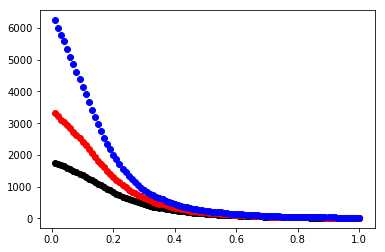

In [31]:
plt.clf()
plt.plot(dists, numDHSclusts2500, 'ok')
plt.plot(dists, numDHSclusts, 'or')
plt.plot(dists, numDHSclusts1e4, 'ob')

plt.show()

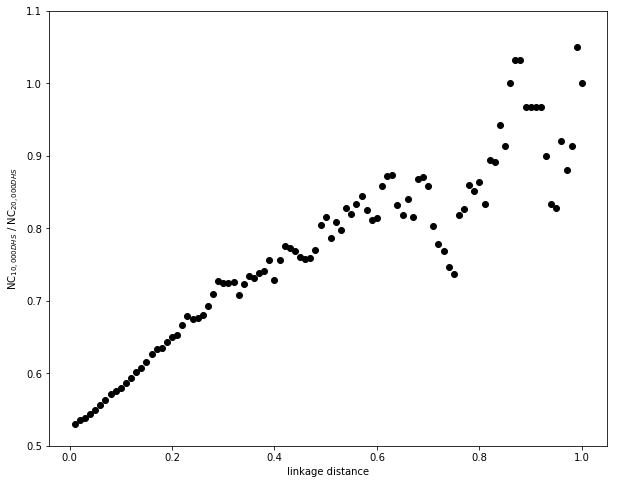

In [75]:
plt.clf()
plt.figure(figsize=(10,8))
plt.plot(dists, np.array(numDHSclusts)/np.array(numDHSclusts1e4), 'ok')
plt.xlabel('linkage distance')
plt.ylabel(r'NC$_{10,000{\rm } DHS}$ / NC$_{20,000{\rm } DHS}$')
plt.ylim(0.5, 1.1)

plt.show()

In [58]:
numDHSclusts1e4[60]

134

In [59]:
numDHSclusts1e4[50]

235

In [33]:
DHSsample2e4 = np.random.choice(NormedMixture.shape[1],20000, replace=False)
print('done')
DHScut2e4 = np.in1d(np.arange(NormedMixture.shape[1]), DHSsample2e4)

ZDHS2e4 = linkage(NormedMixture.T[DHScut2e4], method='complete', metric='euclidean')
print('done with ZDHS')

numDHSclusts2e4 = []
for dist in dists: 
    print('doing', dist)
    clusters = fcluster(ZDHS2e4, dist, criterion='distance')
    numDHSclusts2e4.append(len(list(set(clusters))))

done
done with ZDHS
doing 0.01
doing 0.02
doing 0.03
doing 0.04
doing 0.05
doing 0.06
doing 0.07
doing 0.08
doing 0.09
doing 0.1
doing 0.11
doing 0.12
doing 0.13
doing 0.14
doing 0.15
doing 0.16
doing 0.17
doing 0.18
doing 0.19
doing 0.2
doing 0.21
doing 0.22
doing 0.23
doing 0.24
doing 0.25
doing 0.26
doing 0.27
doing 0.28
doing 0.29
doing 0.3
doing 0.31
doing 0.32
doing 0.33
doing 0.34
doing 0.35
doing 0.36
doing 0.37
doing 0.38
doing 0.39
doing 0.4
doing 0.41
doing 0.42
doing 0.43
doing 0.44
doing 0.45
doing 0.46
doing 0.47
doing 0.48
doing 0.49
doing 0.5
doing 0.51
doing 0.52
doing 0.53
doing 0.54
doing 0.55
doing 0.56
doing 0.57
doing 0.58
doing 0.59
doing 0.6
doing 0.61
doing 0.62
doing 0.63
doing 0.64
doing 0.65
doing 0.66
doing 0.67
doing 0.68
doing 0.69
doing 0.7
doing 0.71
doing 0.72
doing 0.73
doing 0.74
doing 0.75
doing 0.76
doing 0.77
doing 0.78
doing 0.79
doing 0.8
doing 0.81
doing 0.82
doing 0.83
doing 0.84
doing 0.85
doing 0.86
doing 0.87
doing 0.88
doing 0.89
doing 0.9

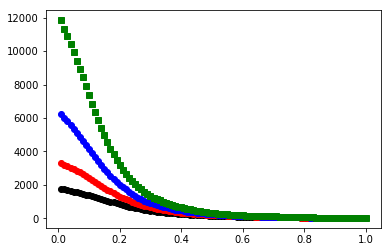

In [34]:
plt.clf()
plt.plot(dists, numDHSclusts2500, 'ok')
plt.plot(dists, numDHSclusts, 'or')
plt.plot(dists, numDHSclusts1e4, 'ob')
plt.plot(dists, numDHSclusts2e4, 'sg')

plt.show()

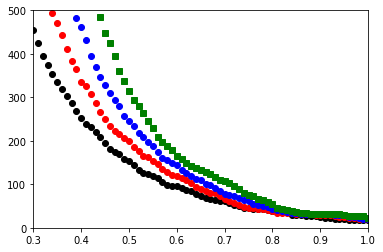

In [35]:
plt.clf()
plt.plot(dists, numDHSclusts2500, 'ok')
plt.plot(dists, numDHSclusts, 'or')
plt.plot(dists, numDHSclusts1e4, 'ob')
plt.plot(dists, numDHSclusts2e4, 'sg')
plt.xlim(0.3, 1.0)
plt.ylim(0, 500)

plt.show()

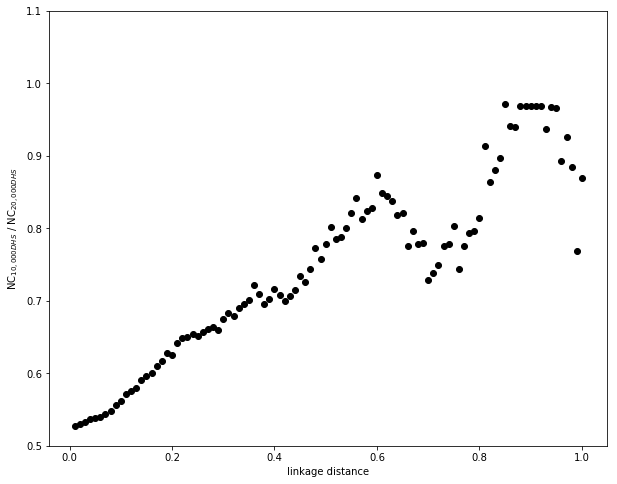

In [76]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.plot(dists, np.array(numDHSclusts1e4)/np.array(numDHSclusts2e4), 'ok')
plt.xlabel('linkage distance')
plt.ylabel(r'NC$_{10,000{\rm } DHS}$ / NC$_{20,000{\rm } DHS}$')
plt.ylim(0.5, 1.1)

plt.show()

In [37]:
dists[59]

0.59999999999999998

In [38]:
numDHSclusts1e4[59]

145

In [39]:
numDHSclusts2e4[59]

166

In [40]:
DHSsample4e4 = np.random.choice(NormedMixture.shape[1],40000, replace=False)
print('done')
DHScut4e4 = np.in1d(np.arange(NormedMixture.shape[1]), DHSsample4e4)

ZDHS4e4 = linkage(NormedMixture.T[DHScut4e4], method='complete', metric='euclidean')
print('done with ZDHS')

numDHSclusts4e4 = []
for dist in dists: 
    print('doing', dist)
    clusters = fcluster(ZDHS4e4, dist, criterion='distance')
    numDHSclusts4e4.append(len(list(set(clusters))))

done
done with ZDHS
doing 0.01
doing 0.02
doing 0.03
doing 0.04
doing 0.05
doing 0.06
doing 0.07
doing 0.08
doing 0.09
doing 0.1
doing 0.11
doing 0.12
doing 0.13
doing 0.14
doing 0.15
doing 0.16
doing 0.17
doing 0.18
doing 0.19
doing 0.2
doing 0.21
doing 0.22
doing 0.23
doing 0.24
doing 0.25
doing 0.26
doing 0.27
doing 0.28
doing 0.29
doing 0.3
doing 0.31
doing 0.32
doing 0.33
doing 0.34
doing 0.35
doing 0.36
doing 0.37
doing 0.38
doing 0.39
doing 0.4
doing 0.41
doing 0.42
doing 0.43
doing 0.44
doing 0.45
doing 0.46
doing 0.47
doing 0.48
doing 0.49
doing 0.5
doing 0.51
doing 0.52
doing 0.53
doing 0.54
doing 0.55
doing 0.56
doing 0.57
doing 0.58
doing 0.59
doing 0.6
doing 0.61
doing 0.62
doing 0.63
doing 0.64
doing 0.65
doing 0.66
doing 0.67
doing 0.68
doing 0.69
doing 0.7
doing 0.71
doing 0.72
doing 0.73
doing 0.74
doing 0.75
doing 0.76
doing 0.77
doing 0.78
doing 0.79
doing 0.8
doing 0.81
doing 0.82
doing 0.83
doing 0.84
doing 0.85
doing 0.86
doing 0.87
doing 0.88
doing 0.89
doing 0.9

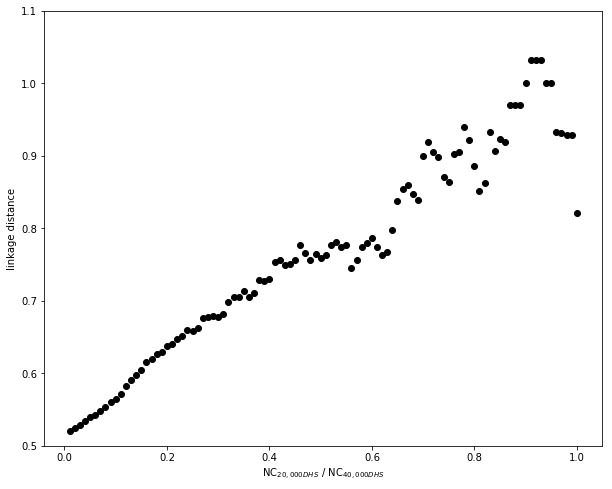

In [61]:
plt.clf()
plt.figure(figsize=(10, 8))

plt.plot(dists, np.array(numDHSclusts2e4)/np.array(numDHSclusts4e4), 'ok')
plt.ylabel('linkage distance')
plt.xlabel(r'NC$_{20,000{\rm } DHS}$ / NC$_{40,000{\rm } DHS}$')
plt.ylim(0.5, 1.1)
plt.show()

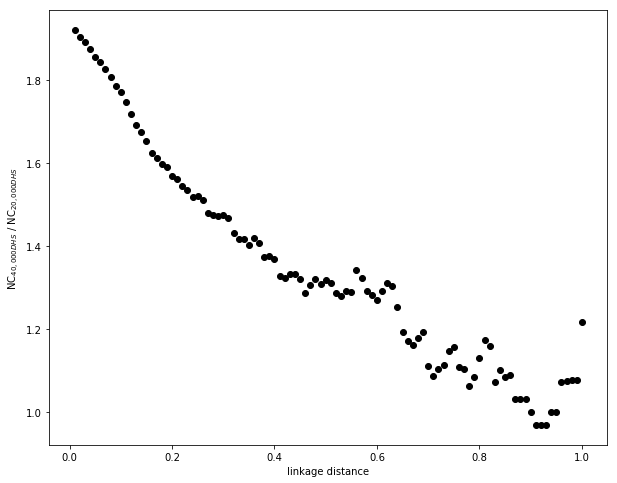

In [70]:
plt.clf()
plt.figure(figsize=(10, 8))

plt.plot(dists, np.array(numDHSclusts4e4)/np.array(numDHSclusts2e4), 'ok')
plt.xlabel('linkage distance')
plt.ylabel(r'NC$_{40,000{\rm } DHS}$ / NC$_{20,000{\rm } DHS}$')
plt.show()

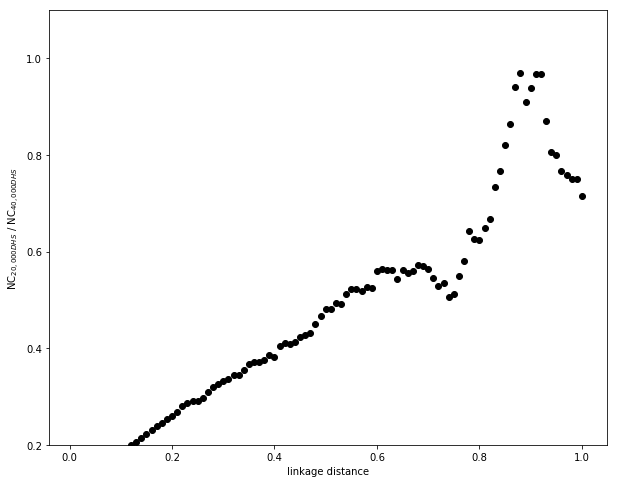

In [71]:
plt.clf()
plt.figure(figsize=(10, 8))

plt.plot(dists, np.array(numDHSclusts)/np.array(numDHSclusts4e4), 'ok')
plt.xlabel('linkage distance')
plt.ylabel(r'NC$_{20,000{\rm } DHS}$ / NC$_{40,000{\rm } DHS}$')
plt.ylim(0.2, 1.1)
plt.show()

In [67]:
numDHSclusts4e4[60]

204

In [ ]:
plt.clf()
plt.figure(figsize=(10, 8))

plt.plot(dists, np.array(numDHSclusts2e4)/np.array(numDHSclusts4e4), 'ok')
plt.ylabel('linkage distance')
plt.xlabel(r'NC$_{20,000{\rm } DHS}$ / NC$_{20,000{\rm } DHS}$')
plt.ylim(0.5, 1.1)
plt.show()

In [ ]:
plt.clf()
plt.figure(figsize=(10, 8))

plt.plot(dists, np.array(numDHSclusts2e4)/np.array(numDHSclusts4e4), 'ok')
plt.ylabel('linkage distance')
plt.xlabel(r'NC$_{10,000{\rm } DHS}$ / NC$_{20,000{\rm } DHS}$')
plt.ylim(0.5, 1.1)
plt.show()

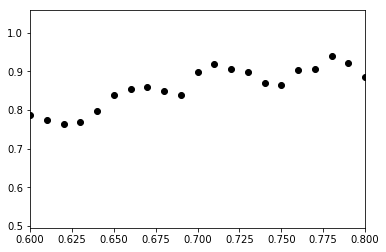

In [43]:
plt.clf()
plt.plot(dists, np.array(numDHSclusts2e4)/np.array(numDHSclusts4e4), 'ok')
plt.xlim(0.6, 0.8)
plt.show()

In [44]:
numDHSclusts4e4[60]

204

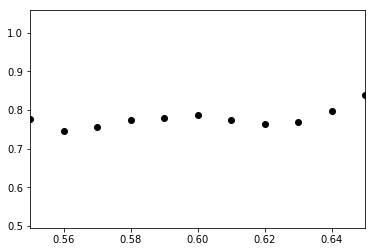

In [72]:
plt.clf()
plt.plot(dists, np.array(numDHSclusts2e4)/np.array(numDHSclusts4e4), 'ok')
plt.xlim(0.55,0.65)
plt.show()

In [73]:
numDHSclusts4e4[50]

384